# import data 

In [286]:
import json
import numpy as np


dimensions = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#dimensions = [10, 20, 30, 40, 50, 60, 70, 80]


data = {}

for dim in dimensions:

    with open('data' + str(dim) + '.json') as json_file:  
        data[dim] = json.load(json_file)

In [287]:
OrderParameterList = {}


for dim in dimensions:
    
    OrderParameter = np.zeros(dim**2 + 1)
    OrderParameter[0]=0
    
    for occupancy in data[dim]:
        count = int(occupancy)
        average_size = 0
        for size in data[dim][occupancy][1]:
            average_size += size
        average_size = average_size / len(data[dim][occupancy][1])
        OrderParameter[int(occupancy)]=average_size / int(occupancy)
        
    OrderParameterList[dim] = OrderParameter



In [3]:
#print(OrderParameter[0])

In [288]:
from scipy.stats import binom

def BinomialMatrix(N,p):
    BM = [binom.pmf(k,N,p) for k in range(N+1)]
    return BM

def CanonicalOP(p):
    COP=np.zeros(10)
    index = 0
    for dim in dimensions:
        N = np.size(OrderParameterList[dim])
        COP[index]=sum(OrderParameterList[dim]*BinomialMatrix(N-1,p))
        index = index + 1
    return COP

In [108]:
#print(CanonicalOP(.2))

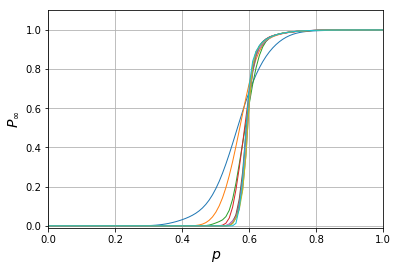

In [289]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

P = [0.01*i for i in range(101)]
OP = np.array([CanonicalOP(p) for p in P]) 

for k in range(10):
    plt.plot(P, OP[:,k],"-", color='C' + str(k), linewidth=1, label=r"0")

plt.grid(True)


plt.xlim(0,1)
plt.ylim(-.01,1.1)
#plt.legend(bbox_to_anchor=(.5, .49), loc=1,frameon=False)
plt.xlabel(r"$p$",fontsize=14)
plt.ylabel(r"$P_{\infty}$",fontsize=14)

plt.show()

In [290]:
matrix_dict = {}
for dim in dimensions:
    matrix_dict[dim] = np.zeros((dim * dim + 1, dim * dim + 1), dtype=float)  
    for occ in data[dim]:
        occupancy = int(occ)
        size_array = np.array(data[dim][occ][0])
        pc_array = np.array(data[dim][occ][1])
        
        #remove percolating clusters from array
        for pc in pc_array:
            indices = np.where(size_array==pc)
            if indices[0].size > 0:
                size_array = np.delete(size_array, indices[0][0])
        array = size_array
        unique, counts = np.unique(array, return_counts=True)        
        ensemble_size = len(data[dim][occ][1])
        tmp_dict = dict(zip(unique, counts / ensemble_size))
        for cluster_size in tmp_dict:
            matrix_dict[dim][occupancy][cluster_size] = tmp_dict[cluster_size] 
            
#notice the structure
# matrix[k,:] gives the distribution of clusters of sizes 1-100 with total occupation k+1,
# here the entry matrix[k,i] is the cluster of size k+1

In [291]:
MicroSuscept = {}
for dim in dimensions:
    print("calculating data set", dim)
    MicroSuscept[dim] = np.zeros(dim * dim + 1)

    vec = np.array([k**2 for k in range(dim * dim + 1)])
    for k in range(dim * dim + 1):
        MicroSuscept[dim][k] = np.dot(vec, matrix_dict[dim][k][:] / np.max([k,1.0]))

    
    
    #for k in range(dim * dim + 1):
    #    for i in range(dim * dim + 1):
    #        MicroSuscept[dim][k] += (i)**2 * matrix_dict[dim][k][i] / np.max([k,1.0]) 



calculating data set 10
calculating data set 20
calculating data set 30
calculating data set 40
calculating data set 50
calculating data set 60
calculating data set 70
calculating data set 80
calculating data set 90
calculating data set 100


In [292]:
from scipy.stats import binom

def BinomialMatrix(N,p):
    BM = [binom.pmf(k,N,p) for k in range(N+1)]
    return BM


def CanonicalSuscept(p):
    CS=np.zeros(10)
    
    index = 0
    for dim in dimensions:
        N = np.size(MicroSuscept[dim])
        CS[index] = sum(MicroSuscept[dim] * BinomialMatrix(N-1,p))
        index += 1
    return CS

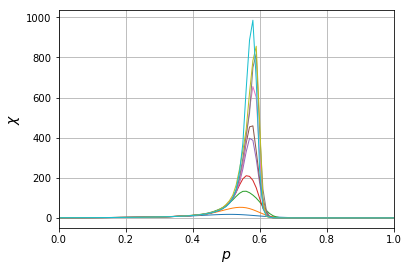

In [293]:
import matplotlib.pyplot as plt
import numpy as np

P = [0.01*i for i in range(101)]
S = np.array([CanonicalSuscept(p) for p in P]) 

for k in range(10):
    plt.plot(P, S[:,k],"-", color='C' + str(k), linewidth=1, label=r"0")

plt.xlim(0,1)
#plt.ylim(0,1.1)


plt.grid(True)


#plt.legend(bbox_to_anchor=(.5, .49), loc=1,frameon=False)
plt.xlabel(r"$p$",fontsize=14)
plt.ylabel(r"$\chi$",fontsize=14)
plt.show()

# find maximum of susceptibility

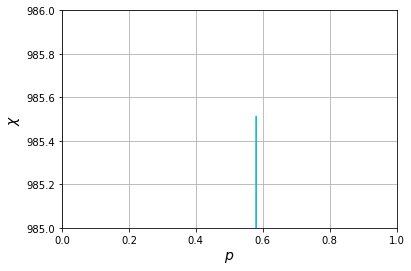

In [294]:
import matplotlib.pyplot as plt
import numpy as np

#P = [0.01*i for i in range(101)]
#S = np.array([CanonicalSuscept(p) for p in P]) 

plt.plot(P, S[:,9],"-", color='C' + str(k), linewidth=1, label=r"0")

plt.xlim(0,1)
plt.ylim(985,986)


plt.grid(True)


#plt.legend(bbox_to_anchor=(.5, .49), loc=1,frameon=False)
plt.xlabel(r"$p$",fontsize=14)
plt.ylabel(r"$\chi$",fontsize=14)
plt.show()

# susceptibility

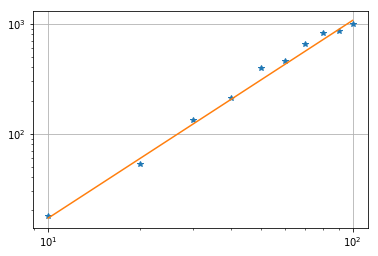

In [295]:
#Define Max: these are the approximate maximum values of susceptiblities for lengths 10,...,100 
MaxSuscept = [17.7,52.8,132.5,210,397.5,459,655,818,856,985.5]


#We fit the L-dependence of the maximum value, this defines the ratio of critical exponents \gamma/\nu
import matplotlib.pyplot as plt
import numpy as np

L = [10*(i+1) for i in range(10)]

#a=-160
#b=130

b=1.8
a=17
LinFit = [a*((k+1)**b) for k in range(10)]


plt.plot(L, MaxSuscept,"*")
plt.plot(L, LinFit,"-")


plt.xscale('log')
plt.yscale('log')


#plt.xlim(0,1)
#plt.ylim(985,986)


plt.grid(True)


#plt.legend(bbox_to_anchor=(.5, .49), loc=1,frameon=False)
#plt.xlabel(r"$p$",fontsize=14)
#plt.ylabel(r"$\chi$",fontsize=14)
plt.show()


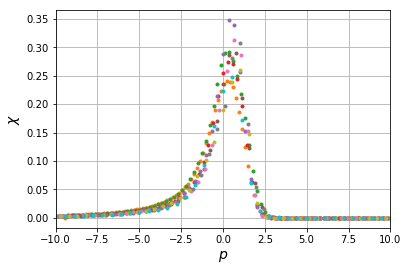

In [333]:
#find p_c by shifting maximum values to 0, then plot as fct of (p-p_c)/p_c*L^{-/\nu} 
# fit value for \nu

import matplotlib.pyplot as plt
import numpy as np

c=.75
d=.5

P[0] = [(0.01*i-d)/d*(L[0])**c for i in range(101)]
P[1] = [(0.01*i-.028-d)/(.028+d)*(L[1])**c for i in range(101)]
P[2] = [(0.01*i-.044-d)/(.044+d)*(L[2])**c for i in range(101)]
P[3] = [(0.01*i-.05-d)/(.05+d)*(L[3])**c for i in range(101)]
P[4] = [(0.01*i-.06-d)/(.06+d)*(L[4])**c for i in range(101)]
P[5] = [(0.01*i-.06-d)/(.06+d)*(L[5])**c for i in range(101)]
P[6] = [(0.01*i-.065-d)/(.065+d)*(L[6])**c for i in range(101)]
P[7] = [(0.01*i-.068-d)/(.068+d)*(L[7])**c for i in range(101)]
P[8] = [(0.01*i-.07-d)/(.07+d)*(L[8])**c for i in range(101)]
P[9] = [(0.01*i-.07-d)/(.07+d)*(L[9])**c for i in range(101)]




#take smallest system size k=0, i.e. L=10 out 
for k in range(1,10):
    plt.plot(P[k], S[:,k]/((10*(k+1))**b),".", color='C' + str(k), linewidth=1, label=r"0")

plt.xlim(-10,10)
#plt.ylim(0,1.1)


plt.grid(True)


#plt.legend(bbox_to_anchor=(.5, .49), loc=1,frameon=False)
plt.xlabel(r"$p$",fontsize=14)
plt.ylabel(r"$\chi$",fontsize=14)
plt.show()

#result indicates \gamma/\nu=1.8 and 1/\nu=.75, that is \gamma=2.4 and \nu=1.33

# order parameter

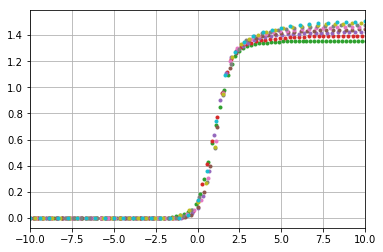

In [353]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#P = [0.01*i for i in range(101)]
#OP = np.array([CanonicalOP(p) for p in P]) 


P[0] = [(0.01*i-d)/d*(L[0])**c for i in range(101)]
P[1] = [(0.01*i-.028-d)/(.028+d)*(L[1])**c for i in range(101)]
P[2] = [(0.01*i-.044-d)/(.044+d)*(L[2])**c for i in range(101)]
P[3] = [(0.01*i-.05-d)/(.05+d)*(L[3])**c for i in range(101)]
P[4] = [(0.01*i-.06-d)/(.06+d)*(L[4])**c for i in range(101)]
P[5] = [(0.01*i-.06-d)/(.06+d)*(L[5])**c for i in range(101)]
P[6] = [(0.01*i-.065-d)/(.065+d)*(L[6])**c for i in range(101)]
P[7] = [(0.01*i-.068-d)/(.068+d)*(L[7])**c for i in range(101)]
P[8] = [(0.01*i-.07-d)/(.07+d)*(L[8])**c for i in range(101)]
P[9] = [(0.01*i-.07-d)/(.07+d)*(L[9])**c for i in range(101)]


#f=-\beta/\nu, i.e. this gives \beta=0.12
f=-0.09

#take smallest system size k=0, i.e. L=10 out 
for k in range(2,10):
    plt.plot(P[k], OP[:,k]/((10*(k+1))**f),".", color='C' + str(k), linewidth=1, label=r"0")

plt.xlim(-10,10)
#plt.ylim(0,1.1)


plt.grid(True)

plt.show()

In [354]:
.09*1.33

0.1197

In [349]:
0.125/1.3

0.09615384615384615